# NETFLIX DATA ANALYSIS !!

In [1]:
# Importing libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

### READING DATASET --

In [2]:
df = pd.read_csv("C:/Users/gokup/Downloads/Netflix-Data-Analysis-main/Netflix-Data-Analysis-main/Netflix Dataset.csv")

##### 1) Head--

In [5]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


#### 2) Tail --

In [7]:
df.tail()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7785,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7788,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Insepectig dataset ---

#### 1) info

In [14]:
# info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


#### 2) columns --

In [13]:
# no. of columns
df.columns   

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

#### 3) data type of dataset --

In [18]:
df.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

### Task#1 - checking for null values--

In [20]:
df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [21]:
round(df.isnull().sum()/df.shape[0]*100).sort_values(ascending= False)

Director        31.0
Cast             9.0
Country          7.0
Title            0.0
Category         0.0
Show_Id          0.0
Release_Date     0.0
Rating           0.0
Duration         0.0
Type             0.0
Description      0.0
dtype: float64

if the missing value is more than 10% then we treat the missing value ,like director have more than 10% we treat it and we drop others

##### treating missing values --

In [3]:
# fill null values with unkonwn in director 
df.fillna({"Director":"unknown"},inplace=True)

In [4]:
# droping null values
df.dropna(inplace=True)

In [26]:
df.isnull().sum()

Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
dtype: int64

### Task#2 - Check whether a duplicate value , if there then remove--

In [5]:
#  checking for null values
df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [6]:
# deleting duplicate values--
df.drop_duplicates(inplace=True)

In [37]:
# now check for duplicte again --
df.duplicated().sum()

np.int64(0)

### Country --

#### top 5 countries with highest tv shows and movies releases

In [44]:
group=df.groupby("Country",as_index=False)["Category"].count().sort_values(by="Category",ascending=False).head()
group

,Country,Category
507,United States,2242
204,India,894
427,United Kingdom,331
263,Japan,220
362,South Korea,180


#### graphical representation --

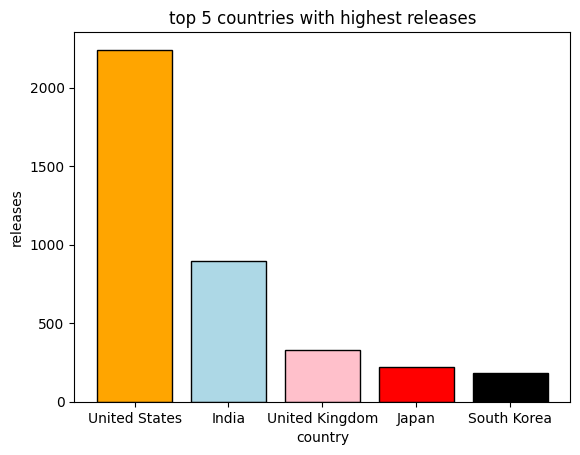

In [55]:
plt.bar(data=group,x="Country",height="Category",color=["orange","lightblue","pink","red","black"],edgecolor="black")
plt.title("top 5 countries with highest releases")
plt.xlabel("country")
plt.ylabel("releases")
plt.show()

##### from the above chart we can see that top 5 countries are USA,India,Uk,Japan,South korea respectively

### YEAR--

#### Year by which tv show and movies highest

In [79]:
# changing dtype of release date from object to datetime
import datetime
df['Date_N'] = pd.to_datetime(df['Release_Date'],errors="coerce")

In [80]:
year= df["Date_N"].dt.year.value_counts()
year

Date_N
2019.0    1833
2020.0    1747
2018.0    1413
2017.0    1000
2016.0     361
2021.0      97
2015.0      65
2014.0      20
2011.0      13
2013.0      10
2012.0       3
2009.0       2
2010.0       1
2008.0       1
Name: count, dtype: int64

#### graphical representation 

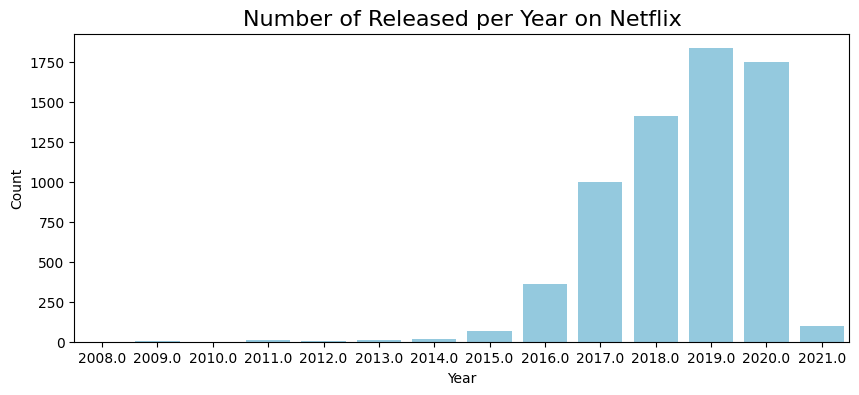

In [91]:
plt.figure(figsize=(10,4))
sns.barplot(x=year.index ,y=year.values,color='skyblue')
plt.title('Number of Released per Year on Netflix', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

#### in year 2019 tv shows and movies are highest on netflix

### CATEGORY {MOVIES AND TVSHOWS}

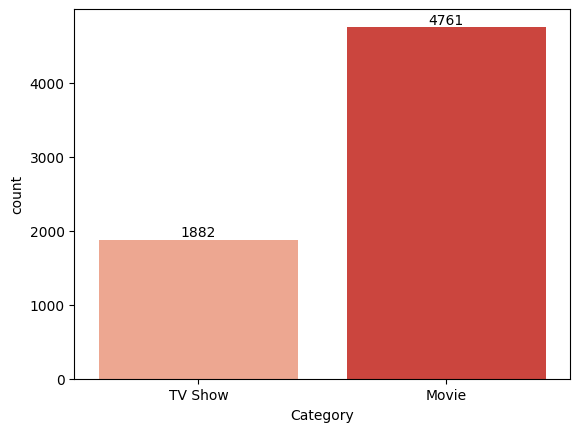

In [98]:
d=sns.countplot(data=df,x="Category",palette="Reds")
for bar in d.containers:
    d.bar_label(bar)

plt.show()

##### From the above chart - Movies are more released than TV shows

### top 5 directors, who gave highest number of movies and tv shows

In [17]:
# Filtering --- removing unknown
filter_dir= df[df["Director"] != "unknown"]

In [13]:
group1 = filter_dir.groupby("Director",as_index=False)["Category"].count().sort_values(by="Category",ascending=False).head(6)
group1

,Director,Category
2736,"Raúl Campos, Jan Suter",18
2065,Marcus Raboy,15
1435,Jay Karas,14
557,Cathy Garcia-Molina,13
2122,Martin Scorsese,12
3573,Youssef Chahine,12


### Ratings--

In [21]:
df["Rating"].nunique()

14

In [22]:
df["Rating"].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'TV-G', 'TV-Y', 'NR',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [24]:
df["Rating"].value_counts()

Rating
TV-MA       2450
TV-14       1636
R            655
TV-PG        627
PG-13        375
PG           238
TV-Y7        208
TV-Y         192
TV-G         146
NR            66
G             38
UR             5
TV-Y7-FV       4
NC-17          3
Name: count, dtype: int64

### Extracting and Analysing Releases from India --

####  No. of releases acc to category

In [56]:
group4 = df[df["Country"] == "India"].groupby("Category").size()
group4

Category
Movie      837
TV Show     57
dtype: int64

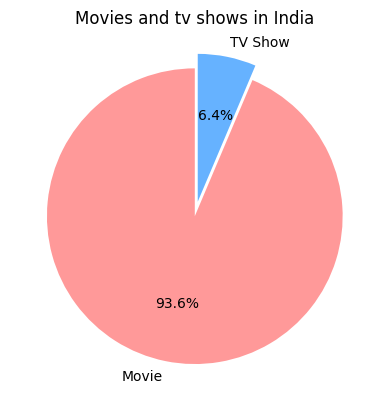

In [62]:
#  GRAPHICAL REPRESENTATION 

ex= [0,0.1]
group4.plot(kind="pie",autopct='%1.1f%%', colors=["#FF9999", "#66B2FF"],startangle=90,explode=ex)
plt.title("Movies and tv shows in India")
plt.show()

#### Ratings given to India releases --

In [76]:
gp = df[df["Country"]=="India"]["Rating"].value_counts()
gp

Rating
TV-14       513
TV-MA       219
TV-PG       126
TV-Y7         9
TV-G          6
TV-Y          5
NR            5
PG-13         4
PG            3
R             2
TV-Y7-FV      1
UR            1
Name: count, dtype: int64

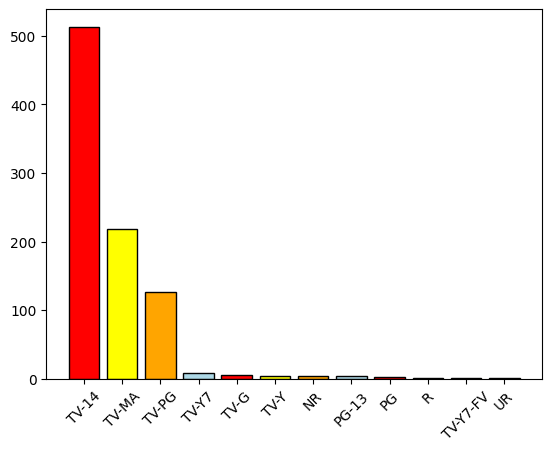

In [78]:
#  graphical representation
plt.bar(data= gp,x= gp.index,height=gp.values,color= ["red","yellow","orange","lightblue"],edgecolor="black")
plt.xticks(rotation=45)
plt.show()

#### TV-14 is the rating which is given to most of releases from india

### Year wises releases in India --

In [84]:
yr = df[df["Country"]== "India"]["Date_N"].dt.year.value_counts()
yr

Date_N
2018.0    333
2019.0    219
2020.0    183
2017.0    137
2021.0     12
2016.0      9
Name: count, dtype: int64

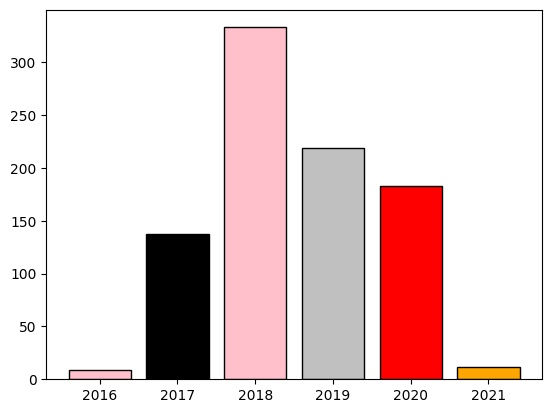

In [91]:
# Graphical representation
plt.bar(data=yr,x=yr.index,height=yr.values,color=["pink","silver","red","black","orange"],edgecolor="black")
plt.show()

#### highest releases in India in year 2018 

## Summary/Conclusion---

**- USA have highest number of TV Shows and Movies releasẹ.**

**- Movies are the highest releases in Netflix than Tv shows.**

**- Highest number of releases in year 2019**

**- Majority of releases have TV-ma rating.**

**- Raúl Campos, Jan Suter Director gives highest number of releases in Netflix.**

**- Even India has released movies more than tv shows.**

**- Majority of Indian releases have TV-14 rating.**

**- Highest releases are in year 2018 from India.**
______________________________________________________________________________________________________________


Thank You !!

By - Yuvraj Singh Rathore
________________________________________________________________________________________________________________________________________________________